# Capstone Module 2: Saas Sales Data Analysis
by Anisha Ayu Putri Mayangsari

> ## Background <br>

A SaaS company has been running their business in selling software to other companies. Their main business over the years have been focused on B2B (Business to Business). As the year 2023 almost ended, the company needs to build their strategy for 2024. The stakeholders want analysis on their running business to determine if their strategy from 2021 is effective. As a data person, we are challenged to analyze the company's performance in the last 3 years.<br>
The core business of this SaaS company centered around their software sales. We have acquired the sales data from system as the raw data.

> ## Problem Statement <br>
The business stakeholders are each department's manager and they want to see the overall achievement in the last 3 years. They want to see:
* Which product is doing good and bad in the market to evaluate their variety of products. 
* What factor influence the business.
* Which market does our product is doing well in business.
* How is the yearly performance<br>

The output is that we can strategize our company sales to improve next year.

`Import Libraries & Data`

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import time
from scipy.stats import chi2_contingency, kstest
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")

In [42]:
df = pd.read_csv("SaaS-Sales.csv")
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


**What kind of data do we have?** <br>
Before we do anything further to the data, we need to state our understanding of the data to avoid miscommunications. Thus, we need to carefully explain each columns in our dataset that contains 19 columns. <br>

**Numerical:**
1. **Row ID**: A unique identifier for each transaction
1. **Order Date**: The date when the order was placed
1. **Customer ID**: A unique identifier for each customer
1. **Sales**: The total sales amount for the transaction
1. **Quality**: The total number of items in the transaction
1. **Discount**: The discount applied to the transaction
1. **Profit**: The profit from the transaction

**Categorical:**
1. **Order ID**: A unique identifier for each order
1. **Date Key**: A numerical representation of the order date (YYYYMMDD)
1. **Contact Name**: The name of the person who placed the order
1. **Country**: The country where the order was placed
1. **City**: The city where the order was placed
1. **Region**: The region where the order was placed
1. **Subregion**: The subregion where the order was placed
1. **Customer**: The name of the company that placed the order
1. **Industry**: The industry the customer belongs to
1. **Segment**: The customer segment (Small-Medium Business, Strategic, Enterprise)
1. **Product**: The product was ordered
1. **License**: The license key for the product

---

> ## Data Cleaning <br>
Before we do the cleaning, we will try to understand the data better. We need to see the data characteristics before we decide to clean them.

### 1. Data Understanding

In [43]:
df.shape

(9994, 19)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [45]:
df_detail = {"Column Name": [], "Total Unique": [], "Unique Values": []}


for i in range(len(df.columns)):
    df_detail["Column Name"].append(df.columns[i])
    df_detail["Total Unique"].append(df[df.columns[i]].nunique())
    df_detail["Unique Values"].append(df[df.columns[i]].sort_values().unique())


df_detail = pd.DataFrame(df_detail)
pd.set_option("display.max_colwidth", 80)

print("Saas Sales: Data Summary")
df_detail

Saas Sales: Data Summary


,Column Name,Total Unique,Unique Values
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ..."
1,Order ID,5009,"[AMER-2020-100090, AMER-2020-100279, AMER-2020-100363, AMER-2020-100762, AME..."
2,Order Date,1237,"[1/1/2023, 1/10/2020, 1/10/2021, 1/10/2022, 1/10/2023, 1/11/2020, 1/11/2022,..."
3,Date Key,1237,"[20200104, 20200105, 20200106, 20200107, 20200108, 20200110, 20200111, 20200..."
4,Contact Name,793,"[Abigail Langdon, Adam Davidson, Adam James, Adam Manning, Adam Nash, Adrian..."
5,Country,48,"[Argentina, Australia, Austria, Belgium, Brazil, Canada, Chile, China, Colom..."
6,City,262,"[Abu Dhabi, Adelaide, Aichi, Alexandria, Alicante, Amsterdam, Anaheim, Ankar..."
7,Region,3,"[AMER, APJ, EMEA]"
8,Subregion,12,"[ANZ, APAC, EU, EU-EAST, EU-WEST, IND, JAPN, LATAM, MEA, NAMER, NOR, UKIR]"
9,Customer,99,"[AT&T, Abbott Laboratories, Aetna, Airbus, Allianz, Allstate, Alphabet, Amaz..."


With this, we can see that our data consists of 19 columns and 9,994 rows in which the datatypes are float, integer, and object. Below are several key takeways we can get from the summary.
1. Row ID and License consisted of all unique values. This means that our Row ID is actually the same as index and the software License are never repeated for every sales.
1. Order ID column only consists of 5009 unique values which indicates that customers can do multiple software purchases on the same order.
1. By far, our company has 14 Products in the market.
1. Our company has the sales scope in:
    * 3 Regions,
    * 12 Sub-regions, 
    * 48 countries,
    * 262 cities. 
1. Our customer profile are:
    * 3 Segments,
    * 10 Industries,
    * 99 Customers.
1. Sales data is valid since the smallest amount is 0.444 (not 0).
1. Quantity data is all valid, since the smallest is 1 and the biggest is 14.
1. Discount data is all valid since the range is from 0 - 80% from original product price.
<br>

After understanding this, we can now process our data for cleaning.

### 2. Handle Missing Value

In [46]:
# Check Missing Value
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We can see from the result above that our data is complete and there is no empty or missing value.

### 3. Data Duplicate

In [47]:
df.duplicated().sum()

0

We can see from the result that there's no duplicated row from the dataset. This is due to our data came directly from the system.

### 4. Outlier Data <br>

Outlier data can determine the outcome of our analysis. We use only 4 numerical columns for this outlier data, which are Sales, Quantity, Discount, and Profit. They are the essential numerical data to be used in this analysis.

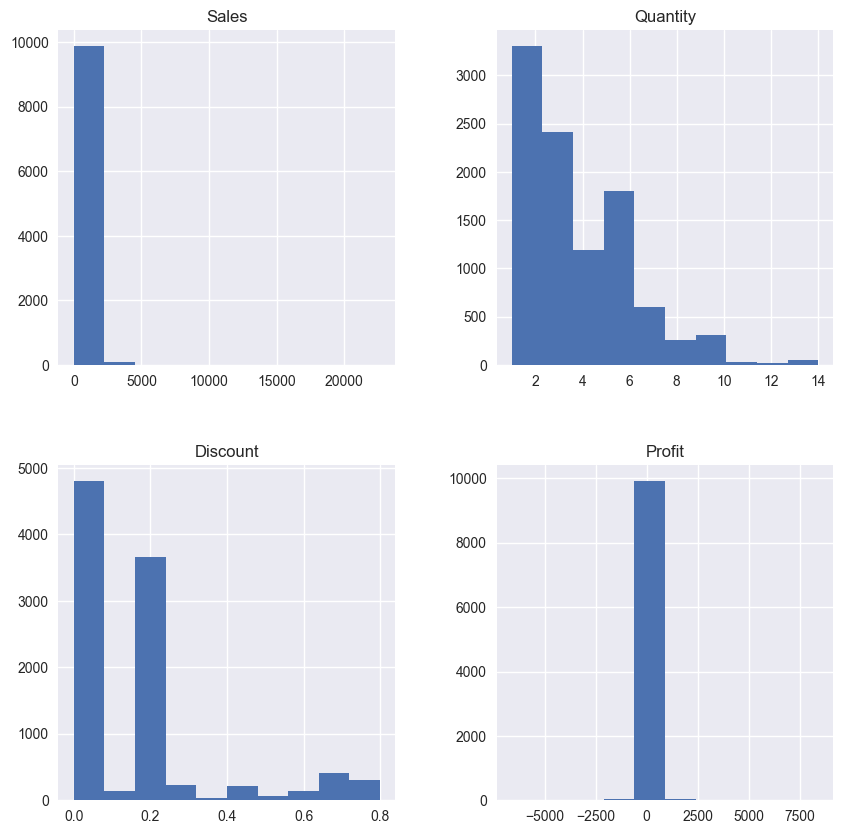

In [48]:
df[["Sales", "Quantity", "Discount", "Profit"]].hist(figsize=(10, 10))
plt.show()

We can see that our numerical data doesn't form a normal distribution shape. We can use boxplot to further identify our outlier data.

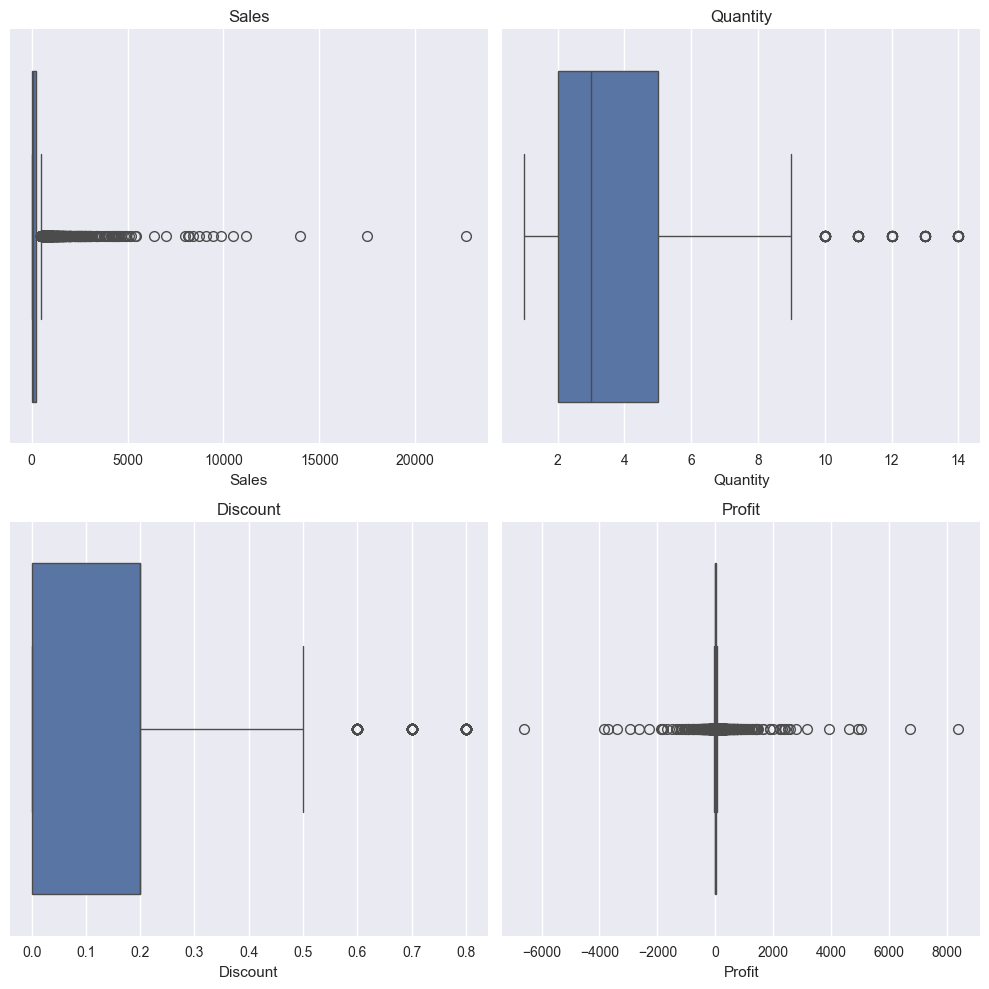

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Boxplot for Sales
sns.boxplot(x=df["Sales"], ax=axes[0, 0])
axes[0, 0].set_title("Sales")

# Boxplot for Quantity
sns.boxplot(x=df["Quantity"], ax=axes[0, 1])
axes[0, 1].set_title("Quantity")

# Boxplot for Discount
sns.boxplot(x=df["Discount"], ax=axes[1, 0])
axes[1, 0].set_title("Discount")

# Boxplot for Profit
sns.boxplot(x=df["Profit"], ax=axes[1, 1])
axes[1, 1].set_title("Profit")

plt.tight_layout()
plt.show()

In [50]:
numerical = ["Sales", "Quantity", "Discount", "Profit"]
lower = []
upper = []
min = []
max = []

for i in range(len(numerical)):
    q1 = df[numerical[i]].describe()["25%"]
    q3 = df[numerical[i]].describe()["75%"]
    iqr = q3 - q1

    lower_val = q1 - (1.5 * iqr)
    upper_val = q3 + (1.5 * iqr)
    min_val = df[numerical[i]].min()
    max_val = df[numerical[i]].max()

    lower.append(lower_val)
    upper.append(upper_val)
    min.append(min_val)
    max.append(max_val)

df_outlier = pd.DataFrame(
    {
        "Data": numerical,
        "Outlier Lower": lower,
        "Outlier Upper": upper,
        "Data Min": min,
        "Data Max": max,
    }
)
df_outlier

,Data,Outlier Lower,Outlier Upper,Data Min,Data Max
0,Sales,-271.710000,498.930000,0.444,22638.480
1,Quantity,-2.500000,9.500000,1.000,14.000
2,Discount,-0.300000,0.500000,0.000,0.800
3,Profit,-39.724125,70.816875,-6599.978,8399.976


Based on the boxplot above, we have detected there are outlier on each of the numerical data. However, by context it is possible to have those data.
1. Sales: Most outlier data are detected above the upper bound. It is possible to have bigger value for our sales, we cannot alter the value for sales as it is based on actual purchase.
2. Quantity: It's still make sense that we have quantity more than 9, thus there is no need to remove the outlier.
3. Discount: By right, discount range should be between 0 and 1. Our data has satisfy the usual discount range and there's no need to remove the outlier.
4. Profit: Similar to Sales, profit is based on our sales performance. We shouldn't alter the value as it is based on actual purchase.

Thus, we do not remove any outlier data as they are still essential for our analysis.

### 5. Check Object Spelling <br>

We need to check whether the object columns have wrong spellings and need to be corrected or not.

In [51]:
pd.set_option("display.max_colwidth", 0)
df_detail.loc[[5, 7, 8, 9, 11, 12, 13]][["Column Name", "Unique Values"]]

,Column Name,Unique Values
5,Country,"[Argentina, Australia, Austria, Belgium, Brazil, Canada, Chile, China, Colombia, Costa Rica, Croatia, Czech Republic, Denmark, Egypt, Finland, France, Germany, Greece, Iceland, India, Indonesia, Ireland, Israel, Italy, Japan, Luxembourg, Mexico, Netherlands, New Zealand, Norway, Philippines, Poland, Portugal, Qatar, Russia, Saudi Arabia, Singapore, Slovenia, South Africa, South Korea, Spain, Sweden, Taiwan, Turkey, Ukraine, United Arab Emirates, United Kingdom, United States]"
7,Region,"[AMER, APJ, EMEA]"
8,Subregion,"[ANZ, APAC, EU, EU-EAST, EU-WEST, IND, JAPN, LATAM, MEA, NAMER, NOR, UKIR]"
9,Customer,"[AT&T, Abbott Laboratories, Aetna, Airbus, Allianz, Allstate, Alphabet, Amazon, American Express, AmerisourceBergen, Anthem, Apple, Aviva, BMW, BNP Paribas, Banco Santander, Bank of America Corp., Berkshire Hathaway, Boeing, Bosch, CVS Health, Carrefour, Caterpillar, Chevron, China National Petroleum, Cigna, Cisco Systems, Citigroup, Coca-Cola, Comcast, ConocoPhillips, Costco Wholesale, Daimler, Enel, Engie, Exxon Mobil, Fannie Mae, FedEx, Ford Motor, Gazprom, General Electric, General Motors, Glencore, Goldman Sachs Group, HSBC Holdings, Home Depot, HonHai Precision Industry, Honda Motor, Huawei, Humana, Intel, Itochu, J.P. Morgan Chase & Co., Johnson & Johnson, Kroger, Lowes, Lukoil, Marathon Petroleum, McKesson, Merck, Microsoft, Mitsubishi, Mondelez International, Morgan Stanley, Nestle, News Corp., Nissan Motor, Oracle, Panasonic, Pemex, PepsiCo, Petrobras, Pfizer, Philip Morris International, Phillips 66, Procter & Gamble, Prudential Financial, Royal Dutch Shell, Safeway, Samsung Electronics, Siemens, Sony, Sprint Nextel, State Farm Insurance Cos., Sysco, Target, Tesco, Toyota Motor, Trafigura Group, Tyson Foods, United Parcel Service, UnitedHealth Group, Valero Energy, Verizon Communications, Volkswagen, Walgreens, Walmart, Walt Disney, Wells Fargo]"
11,Industry,"[Communications, Consumer Products, Energy, Finance, Healthcare, Manufacturing, Misc, Retail, Tech, Transportation]"
12,Segment,"[Enterprise, SMB, Strategic]"
13,Product,"[Alchemy, Big Ol Database, ChatBot Plugin, ContactMatcher, Data Smasher, FinanceHub, Marketing Suite, Marketing Suite - Gold, OneView, SaaS Connector Pack, SaaS Connector Pack - Gold, Site Analytics, Storage, Support]"


As we can see from the result, the data doesn't contain any typos on its value thus making the unique values valid.

### 6. Adjust Data Formatting

In [52]:
df.dtypes

Row ID          int64  
Order ID        object 
Order Date      object 
Date Key        int64  
Contact Name    object 
Country         object 
City            object 
Region          object 
Subregion       object 
Customer        object 
Customer ID     int64  
Industry        object 
Segment         object 
Product         object 
License         object 
Sales           float64
Quantity        int64  
Discount        float64
Profit          float64
dtype: object

We can see that the column Order Date type is still object, whilst the data should be a date. We can also add separate column for Year, Month, and Day for ease further analysis and visualization.

In [53]:
df[["Order Date"]].head(2)  # Checking the current data in Order Date Column

,Order Date
0,11/9/2022
1,11/9/2022


In [54]:
# Change data type
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")
print(df.dtypes)

# Add separate column for Year, Month, Day
df["Order Year"] = df["Order Date"].dt.year
df["Order MonthName"] = df["Order Date"].dt.month_name()  # January, February, etc
df.head(2)

Row ID          int64         
Order ID        object        
Order Date      datetime64[ns]
Date Key        int64         
Contact Name    object        
Country         object        
City            object        
Region          object        
Subregion       object        
Customer        object        
Customer ID     int64         
Industry        object        
Segment         object        
Product         object        
License         object        
Sales           float64       
Quantity        int64         
Discount        float64       
Profit          float64       
dtype: object


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Year,Order MonthName
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136,2022,November
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820,2022,November


### 7. Check Relevant Data

In [55]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order Year', 'Order MonthName'],
      dtype='object')

In [56]:
df["Order Year"].sort_values().unique()

array([2020, 2021, 2022, 2023])

* Row ID is a numerical data that shows the row number. This data has been represented by DataFrame's index, thus we can remove this column.
* Date key is not relevant anymore since we already has a functional Order Date with date type and breaking down its Year, Month, and Day.
* We still have data for 2020 which is not relevant for this analysis as we only need to analyze 2021 - 2023. We can remove this data.

In [57]:
# Remove Row ID and Date Key column
df.drop(columns=["Row ID", "Date Key"], inplace=True)

df.head(2)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Year,Order MonthName
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136,2022,November
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820,2022,November


In [58]:
# Remove 2020 data
df = df[df["Order Year"] > 2020]
df["Order Year"].sort_values().unique()

array([2021, 2022, 2023])

### 8. Add Helper Column <br>
We will need a helper column to categorize profit value. There are 3 types of profit value, which are positive, negative, and zero. This indicates how much value we got from selling our product.

In [59]:
df["Profit Category"] = np.where(
    df["Profit"] == 0, "Neutral", np.where(df["Profit"] > 0, "Profit", "Loss")
)


df[["Profit", "Profit Category"]].head()

,Profit,Profit Category
0,41.9136,Profit
1,219.5820,Profit
2,6.8714,Profit
3,-383.0310,Loss
4,2.5164,Profit


### 9. Data Summary by Describe

In [60]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,8001,2022-10-04 07:33:21.799774976,2021-01-02 00:00:00,2021-12-20 00:00:00,2022-11-05 00:00:00,2023-07-18 00:00:00,2023-12-31 00:00:00,NaN
Customer ID,8001.0,1049.76078,1001.0,1023.0,1049.0,1076.0,1101.0,29.783477
Sales,8001.0,226.590846,0.444,17.48,54.96,208.16,17499.95,586.147708
Quantity,8001.0,3.786027,1.0,2.0,3.0,5.0,14.0,2.22097
Discount,8001.0,0.155684,0.0,0.0,0.2,0.2,0.8,0.206644
Profit,8001.0,29.602931,-6599.978,1.7472,8.7138,29.6688,8399.976,242.26197
Order Year,8001.0,2022.152106,2021.0,2021.0,2022.0,2023.0,2023.0,0.809003


In [61]:
df.describe(include="O").T

,count,unique,top,freq
Order ID,8001,4040,EMEA-2023-100111,14
Contact Name,8001,790,Amy Scott,30
Country,8001,48,United States,1586
City,8001,256,London,781
Region,8001,3,EMEA,3385
Subregion,8001,12,NAMER,1998
Customer,8001,99,Allianz,169
Industry,8001,10,Finance,1752
Segment,8001,3,SMB,4121
Product,8001,14,ContactMatcher,1481


Due to removing data from year 2020, our data is reduced to 8001 rows. We can access our descriptive statistics through this summary table.

---

> ## Exploratory Data Analysis

### Analysis 1: Correlation of Business Location (Region, Country, City) and Profit Category

We use Chi-Squared test to check the correlation between two categorical variable. The hypothesis is as followed:
* H0: Both variables are independent
* Ha: Both variable are dependent

> Chi-Squared test for Business Location & Sales Category

In [62]:
a = pd.crosstab(df["Region"], df["Profit Category"])
b = pd.crosstab(df["Country"], df["Profit Category"])
c = pd.crosstab(df["City"], df["Profit Category"])

stat_a, pval_a, dof_a, expected_a = chi2_contingency(a.fillna(0))
stat_b, pval_b, dof_b, expected_b = chi2_contingency(b.fillna(0))
stat_c, pval_c, dof_c, expected_c = chi2_contingency(c.fillna(0))
alpha = 0.05

data = [
    "Region & Profit Category",
    "Country & Profit Category",
    "City & Profit Category",
]
pval = [pval_a, pval_b, pval_c]
df_chi_sq = pd.DataFrame({"Data Testing": data, "P-Value": pval})
df_chi_sq["Hypothesis"] = np.where(
    df_chi_sq["P-Value"] < alpha,
    "Variables are dependent. Reject H0",
    "Variables are independent. Accept H0",
)
df_chi_sq

,Data Testing,P-Value,Hypothesis
0,Region & Profit Category,1.372997e-81,Variables are dependent. Reject H0
1,Country & Profit Category,0.000000e+00,Variables are dependent. Reject H0
2,City & Profit Category,7.624370e-250,Variables are dependent. Reject H0


By this test result, we can understand that there is significant association between geographical factor and profit category. We can start our analysis further by exploring our geographical data.

Due to the large unique value numbers of Country and City, we will take random samples to see their association to profit category.

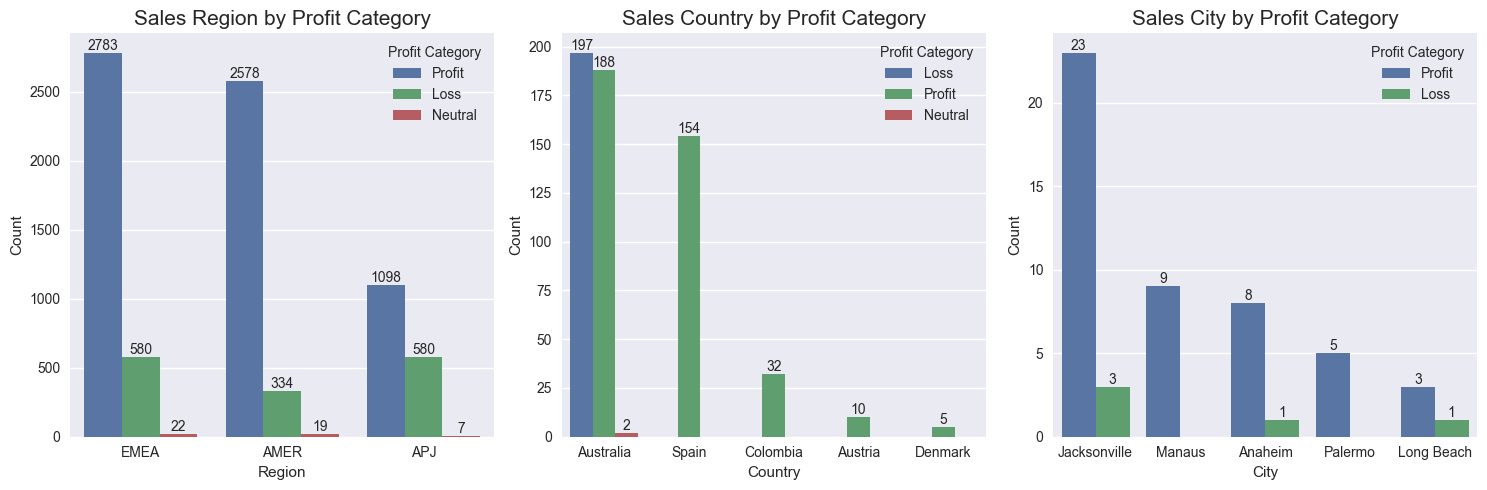

In [63]:
# Generating sample to the country/city list
country_list = pd.DataFrame(data=df['Country'].unique()).sample(5)[0].tolist()
city_list = pd.DataFrame(data=df['City'].unique()).sample(5)[0].tolist()

# Generating the data
by_region = df.groupby(["Region", "Profit Category"]).size().reset_index(name="Count").sort_values(by='Count',ascending=False)
by_country = df.groupby(["Country", "Profit Category"]).size().reset_index(name="Count").sort_values(by='Count',ascending=False)
by_country_filtered = by_country[by_country['Country'].isin(country_list)]
by_city = df.groupby(["City", "Profit Category"]).size().reset_index(name="Count").sort_values(by='Count',ascending=False)
by_city_filtered = by_city[by_city['City'].isin(city_list)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bar plot for Region
ax1=sns.barplot(data=by_region, x="Region", y="Count", hue="Profit Category", ax=axes[0])
axes[0].set_title("Sales Region by Profit Category", size=15)
for i in ax1.containers:
    ax1.bar_label(i)

# Bar plot for Country
ax2=sns.barplot(data=by_country_filtered, x="Country", y="Count", hue="Profit Category", ax=axes[1])
axes[1].set_title("Sales Country by Profit Category", size=15)
for i in ax2.containers:
    ax2.bar_label(i)

# Bar plot for City
ax3=sns.barplot(data=by_city_filtered, x="City", y="Count", hue="Profit Category", ax=axes[2])
axes[2].set_title("Sales City by Profit Category", size=15)
for i in ax3.containers:
    ax3.bar_label(i)

plt.tight_layout()
plt.show()


This shows that:
1. Region vs Profit Category:
    * If we see on the Profit category, EMEA leads first with 2738 sales count and followed with AMER and APJ.
    * However, if we see the Loss category, the count for EMEA matches with APJ even though APJ earns less profitable category.
    * This shows that we have improvement opportunity in APJ region to reduce the loss.
    * We might also want to focus our resources to tailor sales strategy based on their region. <br>
2. Country vs Profit Category:
    * Diving deeper into country level, we can see also that the numbers varied depends on which country we are seeing.
    * Spain, Austria, and Denmark are in the same EMEA region, but they have a very stark difference in terms of profit and loss sales count performance. Spain has leading profit count while the other two is very low in profit count.
3. City vs Profit Category:
    * Diving deeper into city level, the result also showst the numbers are varied based on the city.
    * Jacksonville, Anaheim, and Long Beach all have variety numbers of count and currently Jacksonville leads with most profit count.


Thus, as a global company who has a large scope of market, we can tailor our sales strategy based on the geographical location. We can set a regional strategy and target, then sending the result to each country headquarters to be adjusted by the cities they're operating in. We can operate better with this segmentation rather than giving a single strategy to all operations on all location. But this strategy should be measured in total sales numbers, not sales count. A country might have a high profit count but is still not performing well since their loss is also big.

As a reference, below is the top 5 and bottom 5 countries based on their total profit which we can utilize to maintain the good performance and improve performance.

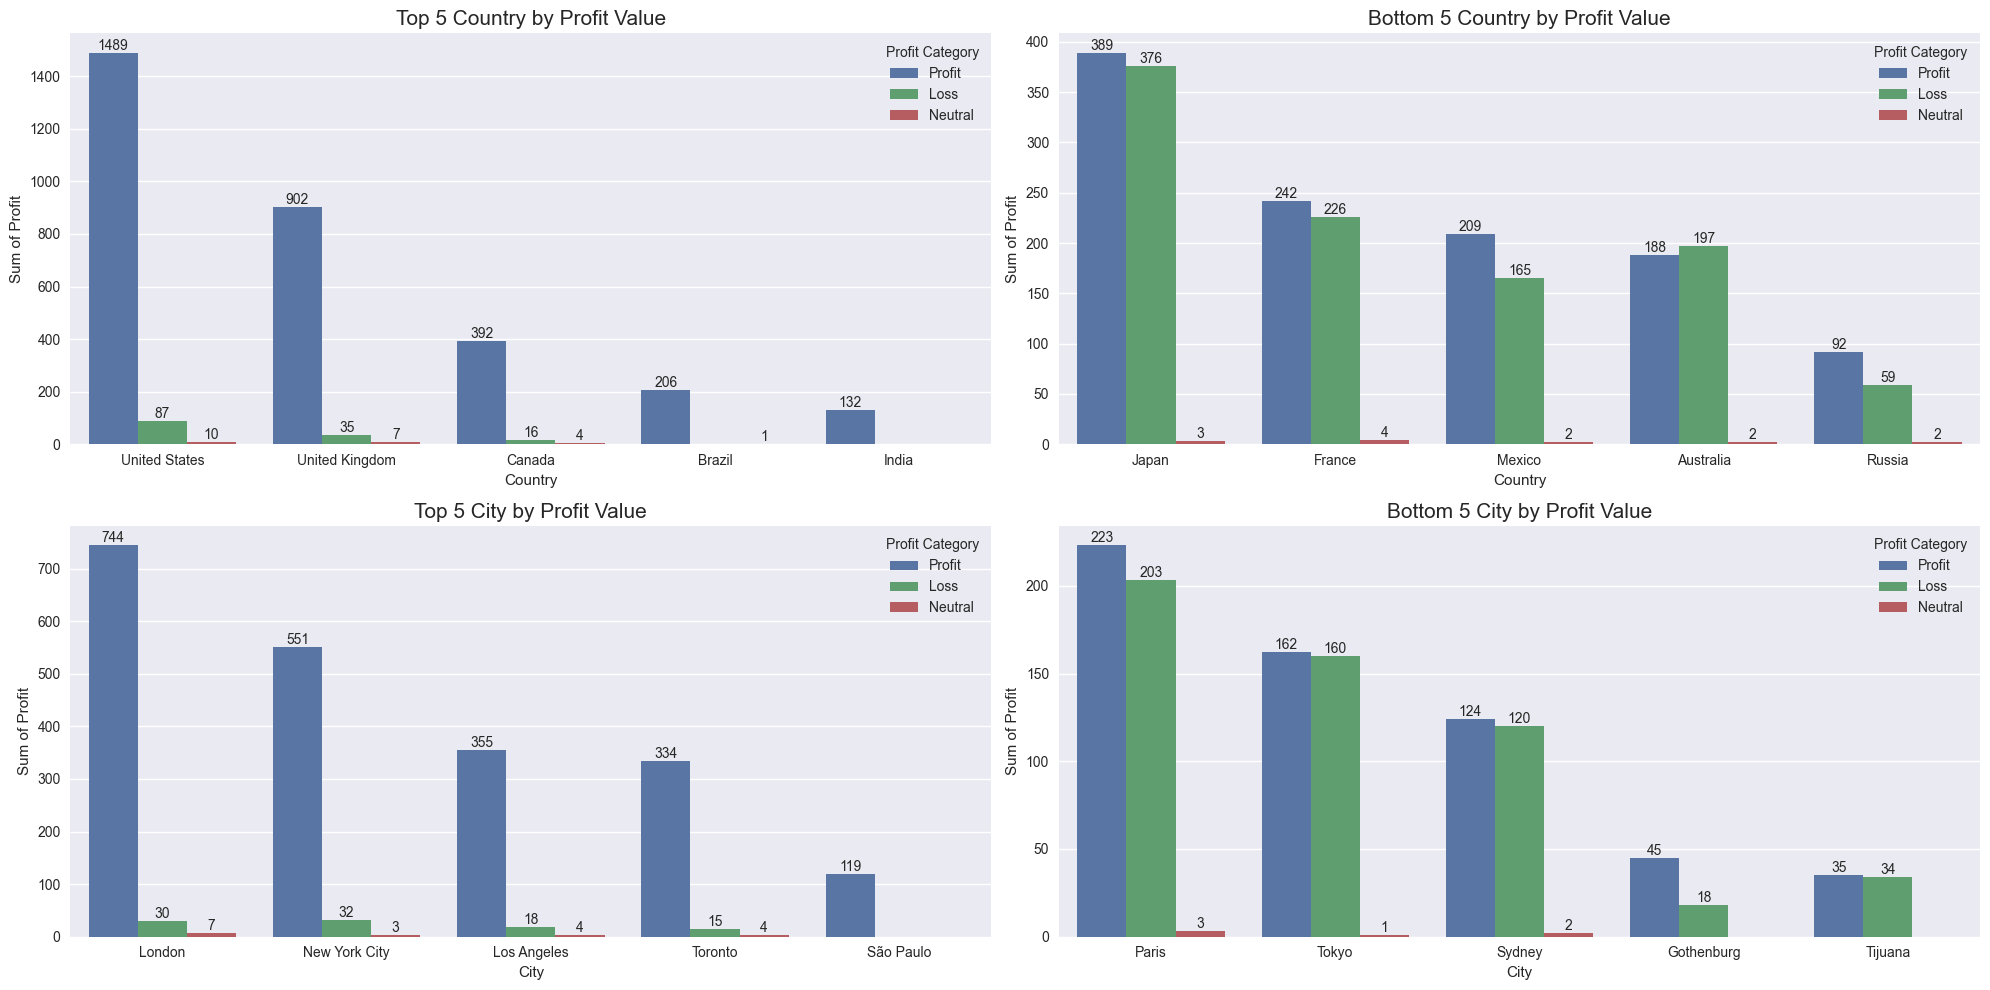

In [64]:
top_5_country_list = df[["Country", "Profit"]].groupby(["Country"]).sum().nlargest(5, "Profit").index.to_list()
top_5_country = by_country[by_country['Country'].isin(top_5_country_list)]

bottom_5_country_list = df[["Country", "Profit"]].groupby(["Country"]).sum().nsmallest(5, "Profit").index.to_list()
bottom_5_country = by_country[by_country['Country'].isin(bottom_5_country_list)]

top_5_city_list = df[["City", "Profit"]].groupby(["City"]).sum().nlargest(5, "Profit").index.to_list()
top_5_city = by_city[by_city['City'].isin(top_5_city_list)]

bottom_5_city_list = df[["City", "Profit"]].groupby(["City"]).sum().nsmallest(5, "Profit").index.to_list()
bottom_5_city = by_city[by_city['City'].isin(bottom_5_city_list)]

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Bar plot for Top 5 Country
ax=sns.barplot(data=top_5_country, x="Country", y="Count", hue="Profit Category", ax=axes[0,0])
axes[0,0].set_title("Top 5 Country by Profit Value", size=15)
axes[0,0].set_ylabel('Sum of Profit')
for i in ax.containers:
    ax.bar_label(i)

# Bar plot for Bottom 5 Country
ax=sns.barplot(data=bottom_5_country, x="Country", y="Count", hue="Profit Category", ax=axes[0,1])
axes[0,1].set_ylabel('Sum of Profit')
axes[0,1].set_title("Bottom 5 Country by Profit Value", size=15)
for i in ax.containers:
    ax.bar_label(i)

# Bar plot for Top 5 City
ax=sns.barplot(data=top_5_city, x="City", y="Count", hue="Profit Category", ax=axes[1,0])
axes[1,0].set_ylabel('Sum of Profit')
axes[1,0].set_title("Top 5 City by Profit Value", size=15)
for i in ax.containers:
    ax.bar_label(i)

# Bar plot for Bottom 5 City
ax=sns.barplot(data=bottom_5_city, x="City", y="Count", hue="Profit Category", ax=axes[1,1])
axes[1,1].set_ylabel('Sum of Profit')
axes[1,1].set_title("Bottom 5 City by Profit Value", size=15)
for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

### Analysis 2: Correlation of Industry and Segment

We use Chi-Squared test to check the correlation between two categorical variable. The hypothesis is as followed:
* H0: Both variables are independent
* Ha: Both variable are dependent

> Chi-Squared test for Industry & Segment

In [65]:
a = pd.crosstab(df["Industry"], df["Segment"])

stat_a, pval_a, dof_a, expected_a = chi2_contingency(a.fillna(0))
alpha = 0.05

data = [
    "Industry & Segment",
]
pval = [pval_a]
df_chi_sq = pd.DataFrame({"Data Testing": data, "P-Value": pval})
df_chi_sq["Hypothesis"] = np.where(
    df_chi_sq["P-Value"] < alpha,
    "Variables are dependent. Reject H0",
    "Variables are independent. Accept H0",
)
df_chi_sq

,Data Testing,P-Value,Hypothesis
0,Industry & Segment,1.406028e-72,Variables are dependent. Reject H0


With this result, we have a valid argument to say that Industry and Segment variables are dependent of each other. We can explore this more to see what kind of association they have.

> Purchase Count Visualization & Analysis

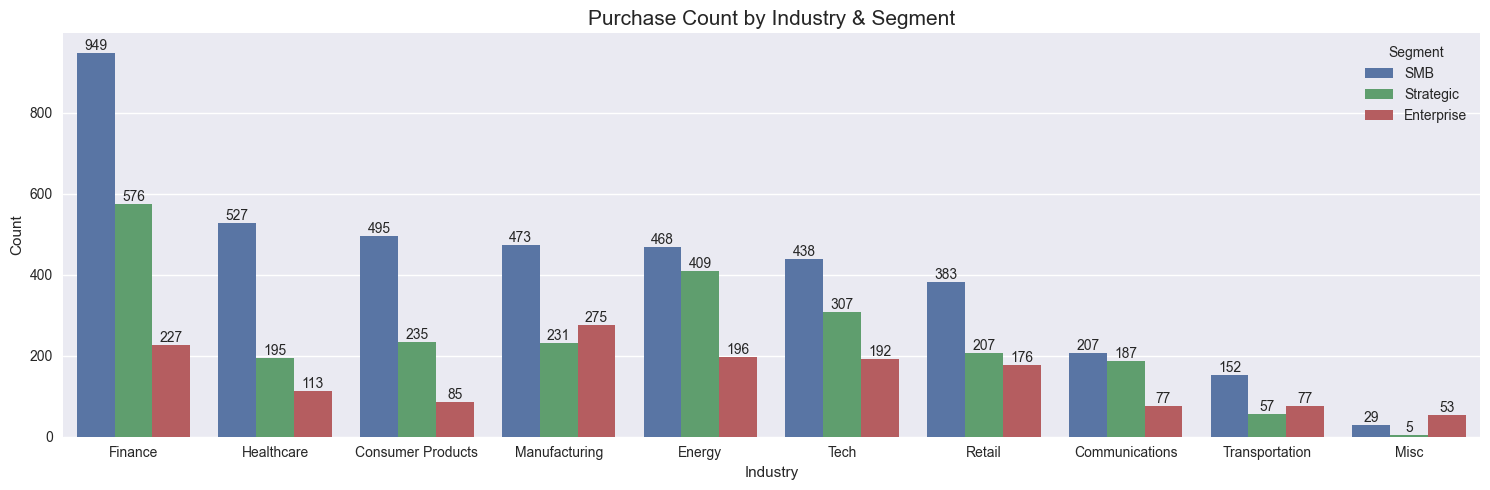

In [66]:
by_industry=df.groupby(['Industry','Segment']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)

plt.figure(figsize=(15,5))
ax=sns.barplot(data=by_industry,x='Industry',y='Count',hue='Segment')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Purchase Count by Industry & Segment',size=15)
plt.tight_layout()
plt.show()

The count number represents how many times the company with certain segment & industry made a software purchase. With this, we can see that the numbers are varied, making the count is dependent on which segment & industry they belong. We can see that:
1. The count for SMB segment is higher than Strategic and Enterprise, making SMB is the largest market segment in our business. They purchased more products from our company.
1. Most of SMB companies use our product runs in Finance industry. Strategic and Enterprise segment in Finance industry also have high number of product purchases from us.
    * We can also conclude that the biggest industry share is Finance.
    * Though, we need to deeper analyse by the number of customers.
1. SMB segment has moderately same purchase count in Healthcare, Consumer Product, Manufacturing, Energy, Tech, and Retail.
1. Even though the count tells us that SMB companies that runs in Finance industry is the one who made most purchase, it may not be the most profitable. 

> Customer Count Visualization & Analysis

We will see how many unique customers that belong in specific industry & segment.

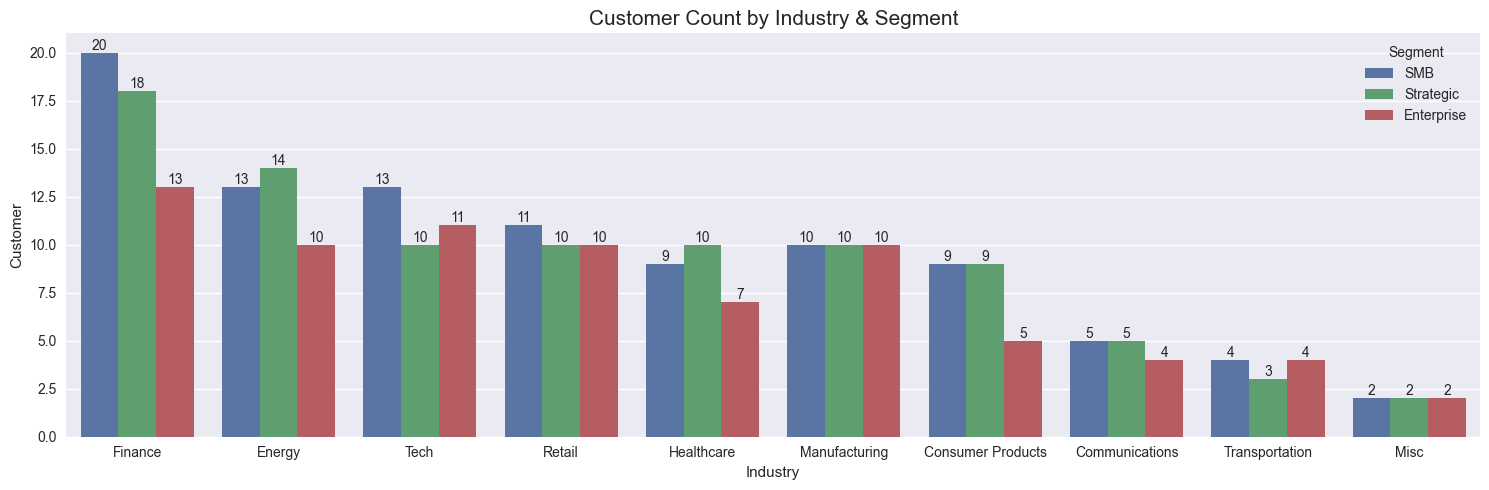

In [67]:
customer_count = (
    df[["Industry", "Segment",'Customer']]
    .groupby(["Segment","Industry"])
    .nunique()
    .sort_values(by="Customer", ascending=False).reset_index()
)

plt.figure(figsize=(15,5))
ax=sns.barplot(data=customer_count,x='Industry',y='Customer',hue='Segment')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Customer Count by Industry & Segment',size=15)
plt.tight_layout()
plt.show()

By seeing the number of customers on each industry and segment, it makes sense why SMB Finance companies have the most purchase, they are the largest in customer number. This also shows us that large number of our customers run a business in Finance industry.

> Sum of Profit Visualization & Analysis

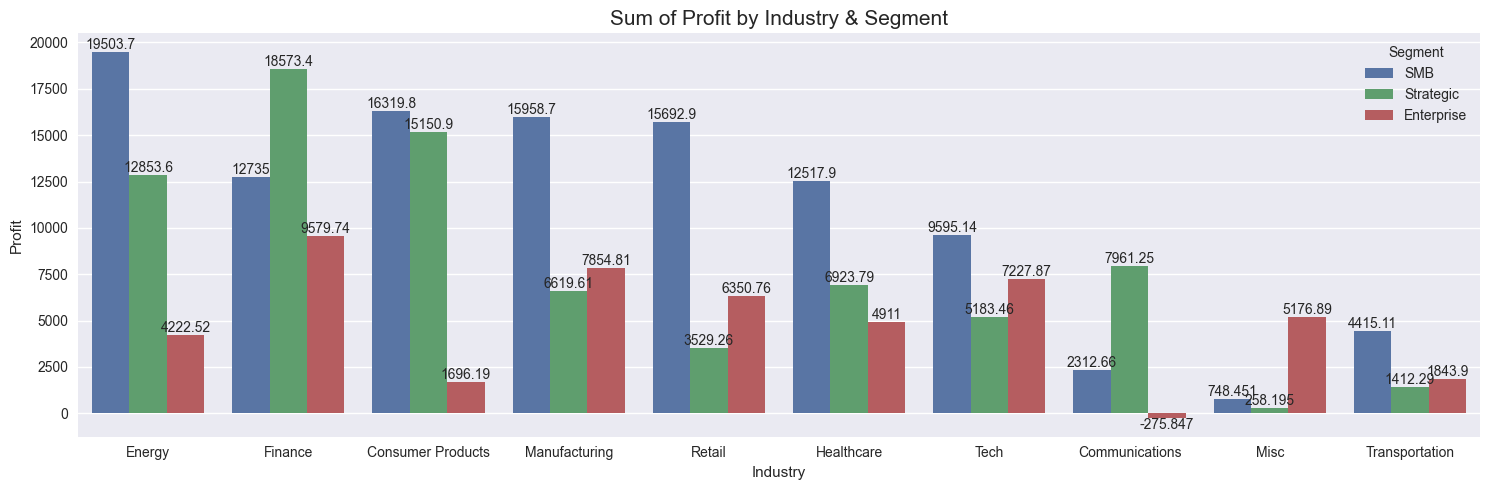

In [68]:
group_segment_industry = (
    df[["Industry", "Segment","Profit"]]
    .groupby(["Segment","Industry"])
    .sum()
    .sort_values(by="Profit", ascending=False).reset_index()
)

plt.figure(figsize=(15,5))
ax=sns.barplot(data=group_segment_industry,x='Industry',y='Profit',hue='Segment')
for i in ax.containers:
    ax.bar_label(i)

plt.title('Sum of Profit by Industry & Segment',size=15)
plt.tight_layout()
plt.show()

1. Interestingly, we can see that the most profitable industry is actually Energy industry for SMB companies.
    * Meaning that by SMB companies in SMB industry actually spent more amount to get our product, because Energy industry is not the top segment by purchase count.
2. In the Finance industry, Strategic companies actually spend more amount compared to SMB companies.
    * This shows that SMB Finance companies purchased multiple products with lower sales amount. On the contrary, Strategic Finance companies are willing to spend bigger figure.
3. Higher numbers are noticable from SMB companies in Consumer Product, Manufacture, and Retail. They aligned with their purchase count which are close in numbers.

In [69]:
group_segment_industry = group_segment_industry.sort_values(by=["Segment", "Industry"])
customer_count = customer_count.sort_values(by=["Segment", "Industry"])

merged_df = pd.merge(group_segment_industry, customer_count, how="inner")

merged_df["Profit per Customer"] = merged_df["Profit"] / merged_df["Customer"]
display(merged_df.loc[[12, 13]], merged_df.loc[[13, 23]])

,Segment,Industry,Profit,Customer,Profit per Customer
12,SMB,Energy,19503.6678,13,1500.282138
13,SMB,Finance,12735.0088,20,636.750440


,Segment,Industry,Profit,Customer,Profit per Customer
13,SMB,Finance,12735.0088,20,636.750440
23,Strategic,Finance,18573.4326,18,1031.857367


This combined data shows that:
1. The profit per customer for SMB Energy is indeed higher than SMB Finance.
    * Thus, we should maintain our relationship with our SMB Energy clients. They might not frequently purchase our product, but they are willing to spend more to use the product.
1. The profit per customer for SMB Finance is smaller than Strategic Finance
    * Since the spending per SMB Finance is actually smaller, we can use the opportunity to broaden our clients. As we know, we have 20 SMB Finance clients, thus proving to the market that we are most capable of handling the SMB Finance requirements.

### Analysis 3: Top Software Product

We will analyse which product is our best-selling product based on the biggest profit & profit margin. Profit margin is the ratio between profit and revenue (or in this data is represented by Sales).

> SaaS Software Product with Biggest Profit

In [70]:
product = df
product["(+) Profit"] = np.where(product["Profit"] > 0, product["Profit"], 0)
product["(-) Profit"] = np.where(product["Profit"] < 0, product["Profit"], 0)

product_group = (
    product[["Product", "Profit", "(+) Profit", "(-) Profit"]].groupby(["Product"]).sum()
)

product_most_profit = product_group.nlargest(5, "Profit")
product_most_loss = product_group.nsmallest(5, "Profit")

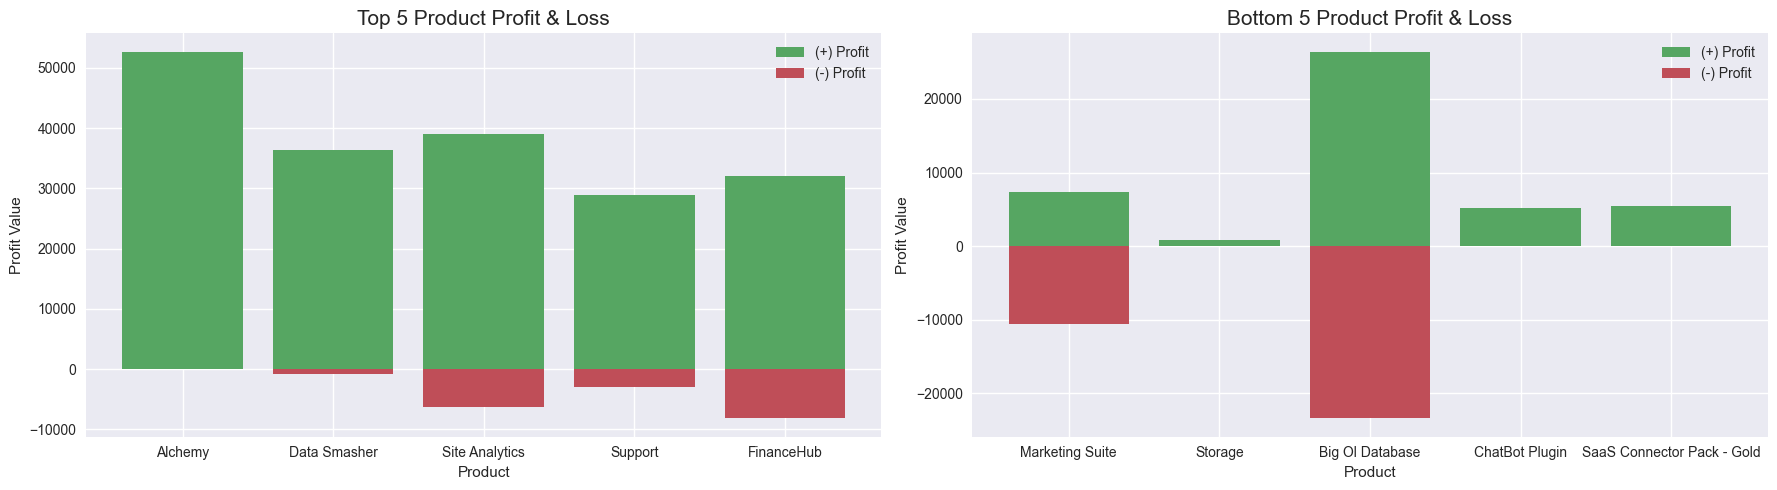

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

x1 = product_most_profit.index.to_list()
y11 = product_most_profit["(+) Profit"]
y12 = product_most_profit["(-) Profit"]

axes[0].bar(x1, y11, color="#56A662", label="(+) Profit")
axes[0].bar(x1, y12, color="#BF4E58", label="(-) Profit")
axes[0].set_title("Top 5 Product Profit & Loss", size=15)
axes[0].set_xlabel("Product")
axes[0].set_ylabel("Profit Value")
axes[0].legend()

x2 = product_most_loss.index.to_list()
y21 = product_most_loss["(+) Profit"]
y22 = product_most_loss["(-) Profit"]

axes[1].bar(x2, y21, color="#56A662", label="(+) Profit")
axes[1].bar(x2, y22, color="#BF4E58", label="(-) Profit")
axes[1].set_title("Bottom 5 Product Profit & Loss", size=15)
axes[1].set_xlabel("Product")
axes[1].set_ylabel("Profit Value")
axes[1].legend()

plt.tight_layout()
plt.show()

From the first figure above, we can conclude that:
* Alchemy product is very healthy as it topped the sales profit and has no negative profit for 3 years straight.
* Both Data Smasther & Support product has less negative profit compared to Site Analytics & FinanceHub.

From the second figure, we can conclude that:
* Marketing Suite is the only product with total profit of negative value.
* Storage product has less negative profit than Marketing Suite & Big OI Database, but produced much less positive profit.
* ChatBot Plugin and SaaS Connector Pack - Gold doesn't have any negative profit, just lower sales profit compared to the other top products.

> SaaS Software Product with Biggest Profit Margin <br>

Aside from getting the top and bottom products from its profit achievement, we can consider how much margin they make. The margin is calculated by sum profit divided by sum sales.

In [72]:
product_margin_group = df[["Product", "Sales", "Profit"]].groupby(["Product"]).sum()

product_margin_group["Profit Margin %"] = round(
    product_margin_group["Profit"] / product_margin_group["Sales"] * 100, 2
)

product_margin_most_profit = product_margin_group.nlargest(5, "Profit Margin %")
product_margin_most_loss = product_margin_group.nsmallest(5, "Profit Margin %")

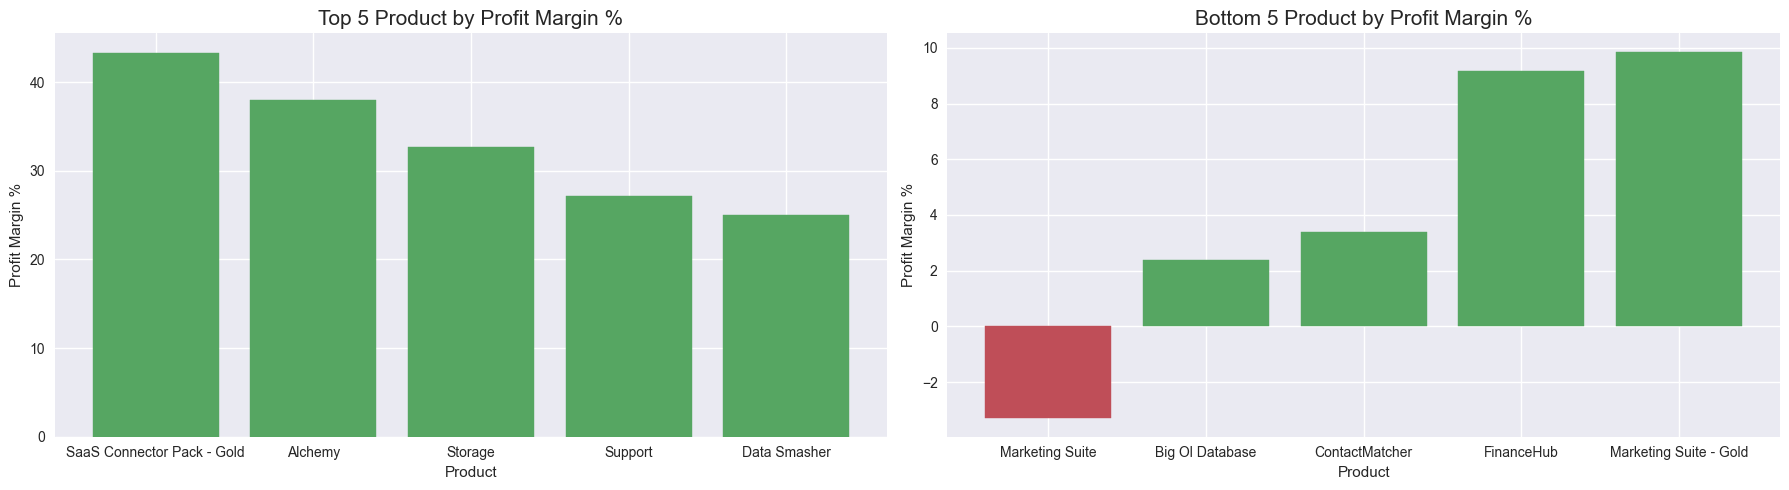

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Top 5 Product Profit Margin %
x1 = product_margin_most_profit.index.to_list()
y1 = product_margin_most_profit["Profit Margin %"]

bars1 = axes[0].bar(x1, y1)
for i in range(len(bars1)):
    if y1[i] < 0:
        bars1[i].set_color("#BF4E58")
    else:
        bars1[i].set_color("#56A662")

axes[0].set_title("Top 5 Product by Profit Margin %", size=15)
axes[0].set_xlabel("Product")
axes[0].set_ylabel("Profit Margin %")

# Bottom 5 Product Profit Margin %
x2 = product_margin_most_loss.index.to_list()
y2 = product_margin_most_loss["Profit Margin %"]

bars2 = axes[1].bar(x2, y2)
for i in range(len(bars2)):
    if y2[i] < 0:
        bars2[i].set_color("#BF4E58")
    else:
        bars2[i].set_color("#56A662")

axes[1].set_title("Bottom 5 Product by Profit Margin %", size=15)
axes[1].set_xlabel("Product")
axes[1].set_ylabel("Profit Margin %")

plt.tight_layout()
plt.show()

From the first figure above, we can conclude that:
* Our top performing profit margin ranged from 25% up to 43%
* The top profit margin belongs to SaaS Connector Pack - Gold, which is actually listed as our bottom 5 product by sales profit. Even though the total sales doesn't perform very well, this product is a potential high profitable based on the margin.
* Three out of our top five product by sales profit is already a high profit margin product, which are Alchemy, Support, and Data Smasher.

From the second figure, we can conclude that:
* Our bottom performing profit margin ranged from -3% t0 9.8%
* Marketing Suite has a negative profit margin. Meaning, it's total profit is negative and it's like our company actually paid to sell those product.
* The other four product has a very low profit margin and all of them is below 10%.

### Analysis 4: Correlation of Sales, Quantity, Discount, and Profit

> Normal Distribution Testing

The Sales, Quantity, Discount, and Profit are numerical variables. We need to test whether they follow a normal distribution or not.

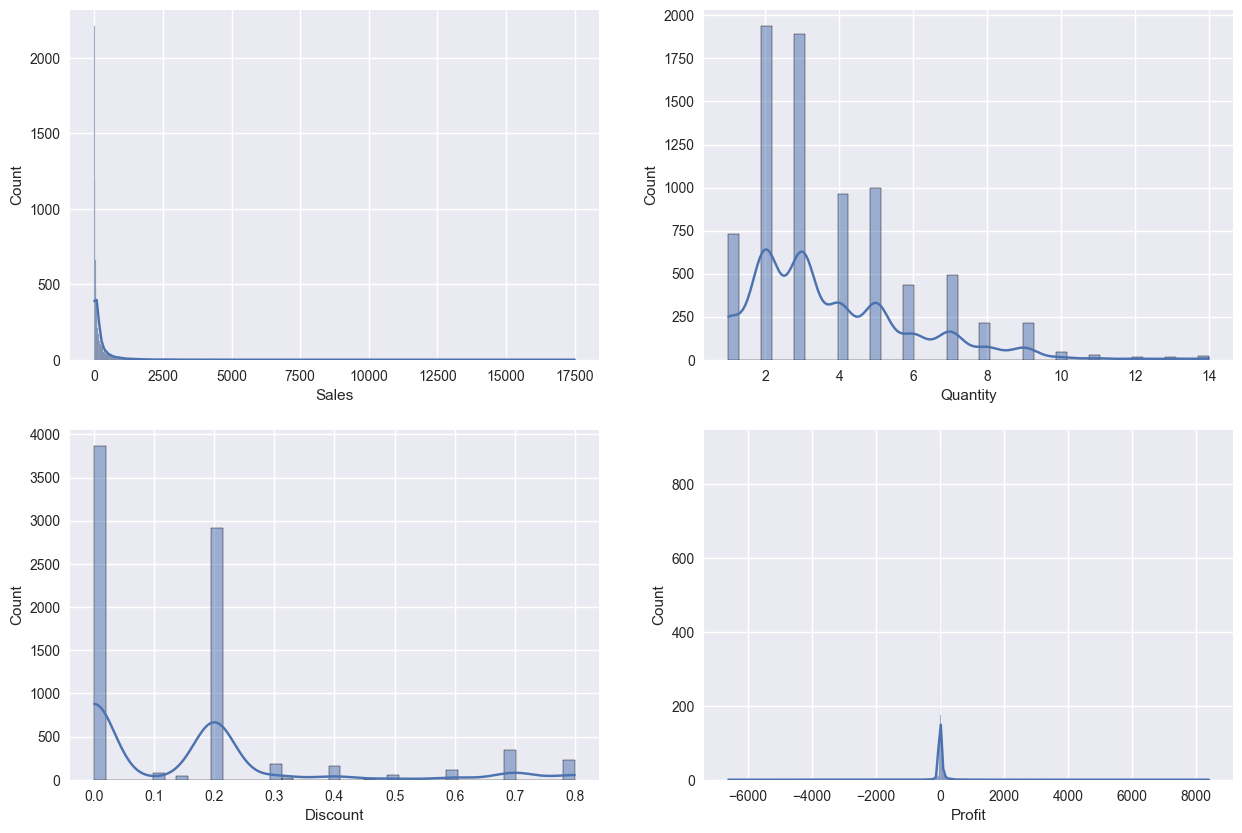

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Sales'], kde=True,ax=axes[0,0])
sns.histplot(df['Quantity'], kde=True,ax=axes[0,1])
sns.histplot(df['Discount'], kde=True,ax=axes[1,0])
sns.histplot(df['Profit'], kde=True,ax=axes[1,1])
plt.show()

In [75]:
from scipy.stats import kstest

ks_statistic_a, ks_pval_a = kstest(df['Sales'],'norm')
ks_statistic_b, ks_pval_b = kstest(df['Quantity'],'norm')
ks_statistic_c, ks_pval_c = kstest(df['Discount'],'norm')
ks_statistic_d, ks_pval_d = kstest(df['Profit'],'norm')
alpha = 0.05

data=['Sales','Quantity','Discount','Profit']
pval=[ks_pval_a,ks_pval_b,ks_pval_c,ks_pval_d]

df_chi_sq = pd.DataFrame({"Data Testing": data, "P-Value": pval})
df_chi_sq["Hypothesis"] = np.where(
    df_chi_sq["P-Value"] < alpha,
    "NOT Normal Distribution",
    "Normal Distribution",
)
df_chi_sq

,Data Testing,P-Value,Hypothesis
0,Sales,0.0,NOT Normal Distribution
1,Quantity,0.0,NOT Normal Distribution
2,Discount,0.0,NOT Normal Distribution
3,Profit,0.0,NOT Normal Distribution


From both graphical method and frequentist test, we can conclude that Sales, Quantity, Discount, and Profit is not a normal distribution. Thus, we can use the spearman correlation to determine the association between these numerical variables.

> Correlation Heatmap using Spearman Method

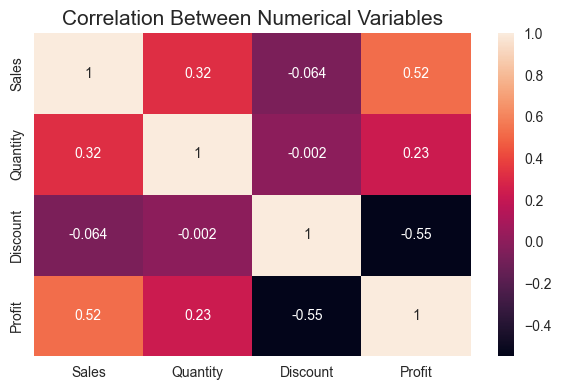

In [76]:
numerical_corr = df[['Sales','Quantity','Discount','Profit']].corr(method='spearman').round(3)
plt.figure(figsize=(6,4))
sns.heatmap(numerical_corr,annot=True)
plt.title('Correlation Between Numerical Variables',size=15)
plt.tight_layout()
plt.show()

From this heatmap, we can see that there are both positive and negative correlation:
1. Positive Correlation:
    1. Quantity vs Sales (corr 0.32): The correlation is positive, so that when Quantity increased, so does Sales number.
    1. Profit vs Sales (corr 0.52): The correlation is positive, so that when Profit increased, so does the Sales number.
    1. Profit vs Quantity (corr 0.23): The correlation is positive, so that when the Quantity is increased, so does the Discount.
1. Negative Correlation:
    1. Discount vs Sales (corr -0.064): The correlation is negative, so that when the Discount is increased, it doesn't mean that we get higher Sales number.
    1. Discount vs Quantity (corr -0.002): The correlation is negative and very small. Meaning that when the Discount it increased, it didn't strongly increase the number of Quantity.
    1. Discount vs Profit (corr -0.55): The correlation is negative. Meaning that when we give higher discount, it actually decreased our Profit.

Key takeaway from this correlation is that all variable associated with Discount has a negative correlation. We need to work on our discount strategy to help increase our Sales and Profit. This shows that our current strategy is not quite effective in helping increase the numbers.

### Analysis 5: Sales & Profit Performance by Time

With this, we want to see our sales performance by time.

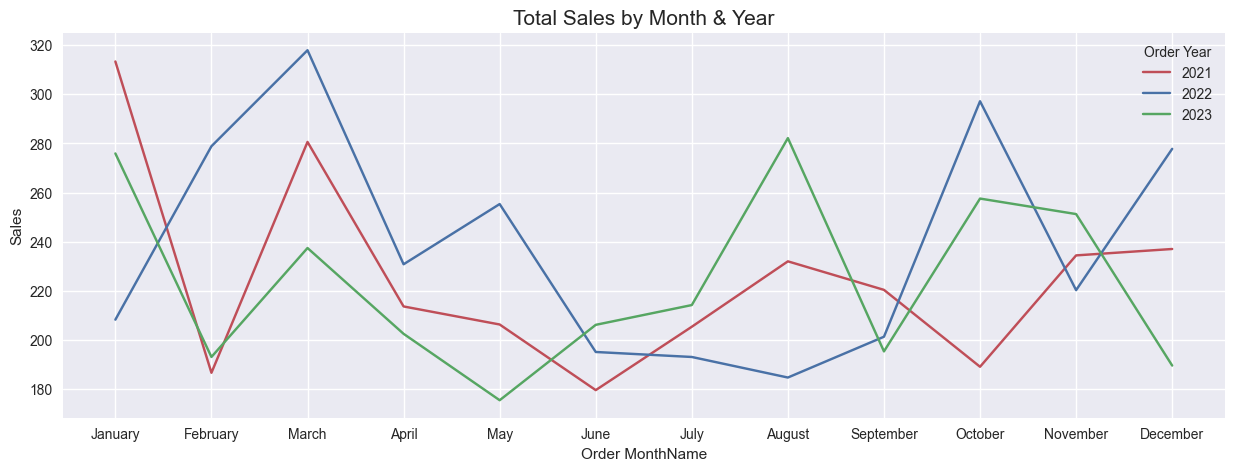

In [77]:
performance = df.sort_values(by="Order Date")
plt.figure(figsize=(15, 5))
sns.lineplot(data=performance, x="Order MonthName", y="Sales", hue="Order Year", ci=None, palette=['#BF4E58','#4971A6','#56A662'],)
plt.title("Total Sales by Month & Year", size=15)
plt.show()

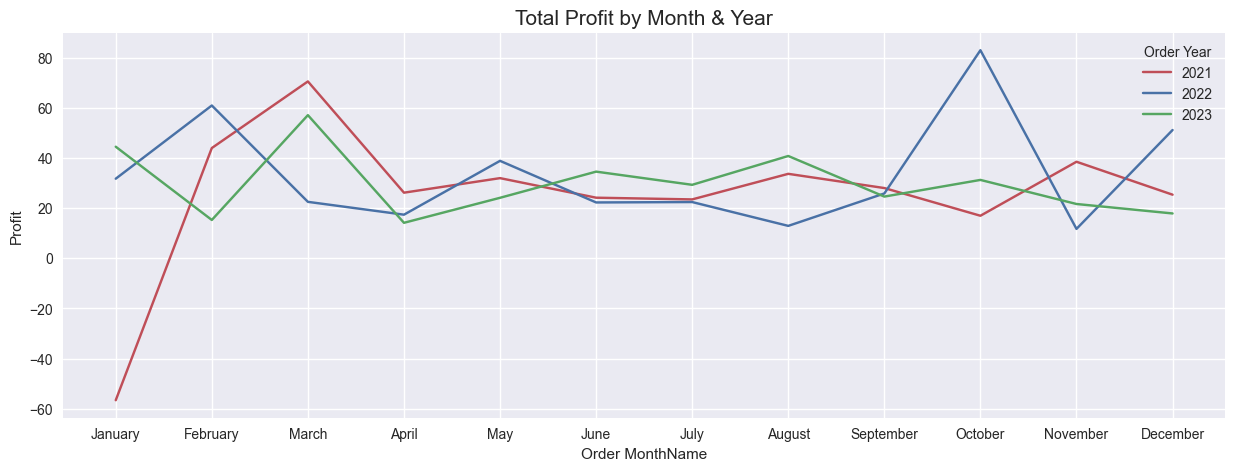

In [78]:
plt.figure(figsize=(15,5))
sns.lineplot(data=performance, x='Order MonthName', y='Profit',hue='Order Year',ci=None,palette=['#BF4E58','#4971A6','#56A662'])
plt.title('Total Profit by Month & Year', size=15)
plt.show()


* Interestingly, our performance in the end of 2023 is actually decreasing in numbers of Sales and Profit. This might be due to the closing business around holiday season.
* We cannot see a similar trend between each year. But we can see that we have the higher sales & profit on:
    * 2021: Top sales in January, top profit on March
    * 2022: Top sales in March, top profit on October
    * 2023: Top sales in August, top profit on March.

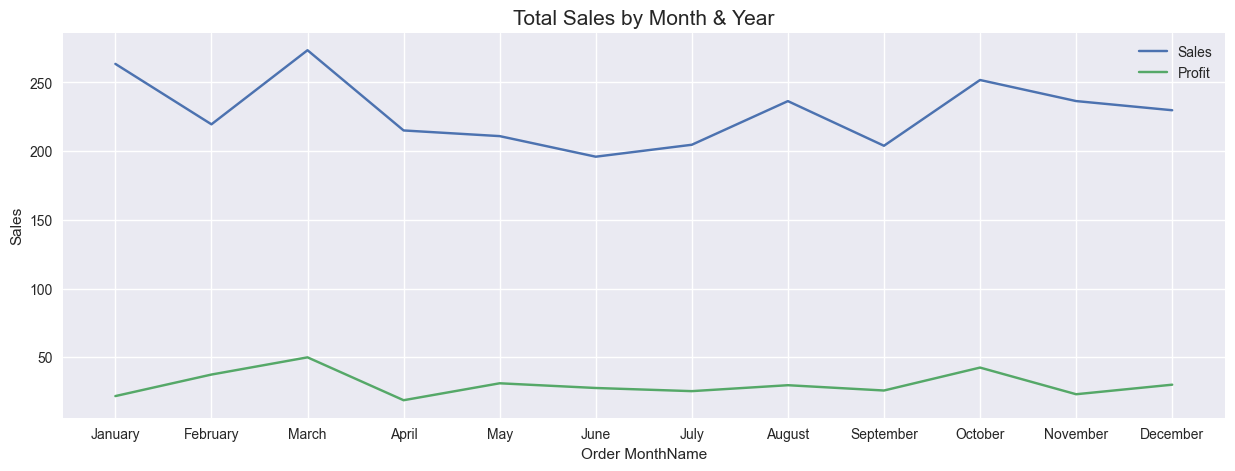

In [79]:
performance=df.sort_values(by='Order Date')
plt.figure(figsize=(15,5))
sns.lineplot(data=performance, x='Order MonthName', y='Sales',ci=None)
sns.lineplot(data=performance, x='Order MonthName', y='Profit',ci=None)
plt.title('Total Sales by Month & Year', size=15)
plt.legend(['Sales','Profit'])
plt.show()


By total sales & profit, we can almost see the same graphic shape. This shows that mostly our operating cost percentage is consistent throughout the years.

> ## Other Analysis

Below are the analysis that was explored but didn't get the desired outcome.

In [80]:
a = pd.crosstab(df["Industry"], df["Product"])
b = pd.crosstab(df["Segment"], df["Product"])
c = pd.crosstab(df["Region"], df["Product"])
d = pd.crosstab(df["Country"], df["Product"])
e = pd.crosstab(df["City"], df["Product"])
f = pd.crosstab(df["Region"], df["Segment"])
g = pd.crosstab(df["Country"], df["Segment"])
h = pd.crosstab(df["City"], df["Segment"])
i = pd.crosstab(df["Segment"], df["Profit Category"])
j = pd.crosstab(df["Industry"], df["Profit Category"])

stat_a, pval_a, dof_a, expected_a = chi2_contingency(a.fillna(0))
stat_b, pval_b, dof_b, expected_b = chi2_contingency(b.fillna(0))
stat_c, pval_c, dof_c, expected_c = chi2_contingency(c.fillna(0))
stat_d, pval_d, dof_d, expected_d = chi2_contingency(a.fillna(0))
stat_e, pval_e, dof_e, expected_e = chi2_contingency(b.fillna(0))
stat_f, pval_f, dof_f, expected_f = chi2_contingency(c.fillna(0))
stat_g, pval_g, dof_g, expected_g = chi2_contingency(a.fillna(0))
stat_h, pval_h, dof_h, expected_h = chi2_contingency(b.fillna(0))
stat_i, pval_i, dof_i, expected_i = chi2_contingency(c.fillna(0))
stat_j, pval_j, dof_j, expected_cj = chi2_contingency(c.fillna(0))
alpha = 0.05

data = [
    "Industry & Product",
    "Segment & Product",
    "Region & Product",
    "Country & Prodyct",
    "City & Product",
    "Region & Segment",
    "Country & Segment",
    "City & Segment",
    "Segment & Profit Category",
    "Industry & Profit Category"
]
pval = [pval_a, pval_b, pval_c, pval_d, pval_e, pval_f, pval_g, pval_h, pval_i, pval_j]
df_chi_sq = pd.DataFrame({"Data Testing": data, "P-Value": pval})
df_chi_sq["Hypothesis"] = np.where(
    df_chi_sq["P-Value"] < alpha,
    "Variables are dependent. Reject H0",
    "Variables are independent. Accept H0",
)
df_chi_sq

,Data Testing,P-Value,Hypothesis
0,Industry & Product,0.588442,Variables are independent. Accept H0
1,Segment & Product,0.621824,Variables are independent. Accept H0
2,Region & Product,0.949759,Variables are independent. Accept H0
3,Country & Prodyct,0.588442,Variables are independent. Accept H0
4,City & Product,0.621824,Variables are independent. Accept H0
5,Region & Segment,0.949759,Variables are independent. Accept H0
6,Country & Segment,0.588442,Variables are independent. Accept H0
7,City & Segment,0.621824,Variables are independent. Accept H0
8,Segment & Profit Category,0.949759,Variables are independent. Accept H0
9,Industry & Profit Category,0.949759,Variables are independent. Accept H0


Turns out, all of the variables are independent, thus not correlated to each other. Making no connection to one variable if the other one variable increase/decrease.

---

> ## Conclusion

1. Geographical location up to City level is correlated with profit category
2. Industry and Segment is correlated with each other.
3. The product with most profit is Alchemy and the smallest profit is Marketing Suite.
4. The product with highest profit margin is SaaS Connector Pack - Gold and the smallest profit margin is Marketing Suite.
5. Sales, Quantity, and Profit positively correlate with each other. With the top correlation is between Sales and Profit.
6. Discount is negatively correlates with Sales, Quantity, and Profit. With the lowest correlation is between Discount and Profit.
7. The sales & profit performance doesn't show any consistent shape, but the year 2023 has the lowest performance.
8. The profit margin over 3 years is consistent.

> ## Recommendation <br>

1. Tailor sales strategy which is measured in total sales number, based on the geographical location. This can be achieved by setting up a regional strategy and target then sending it to each country headquarters. By then, the country will need to adjust their strategy based on their active operating cities.
1. We have the largest market share in SMB segment and Finance industry.
    * SMB Energy has the highest sales profit performance. Keep up the good relationship and encourage them to purchase more by creating bundling deals since they tend not to purchase frequently, but willing to spend more to get the product.
    * Finance sector has the most sales profit in Strategy segment, not SMB. In comparison, there are 18 Strategic Finance clients and 20 SMB Finance clients. We can use the opportunity to broaden our SMB Finance clients and utilize our portfolio in handling SMB Finance requirements.
1. Although Alchemy product is the best-selling product, we need to increase our sales in SaaS Connector Pack - Gold as they have the biggest profit margin. With more sales quantity, this product can potentially bring growth.
1. Re-evaluate the strategy in giving discounts as it is statistically proven that it doesn't increase neither our Sales, Quantity, or Sales.
1. Note that historically, the market demand tends to increase in March, August, and October. January does have a higher sales, but tends to have lower profit.
1. Keep up the consistent percentage between sales & profit.